In [1]:
from models import PBFTPK, EnsembledPBFTPK, EffectiveEnsembledPBFTPK
import numpy as np

In [2]:
samples = np.load('samples.npy')

In [3]:
import matplotlib.pyplot as plt

In [4]:
from joblib import Parallel, delayed

In [5]:
import scipy.stats as stats

In [6]:
import warnings
warnings.filterwarnings('ignore')

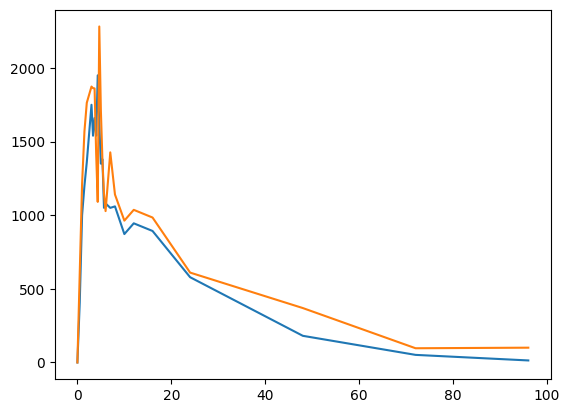

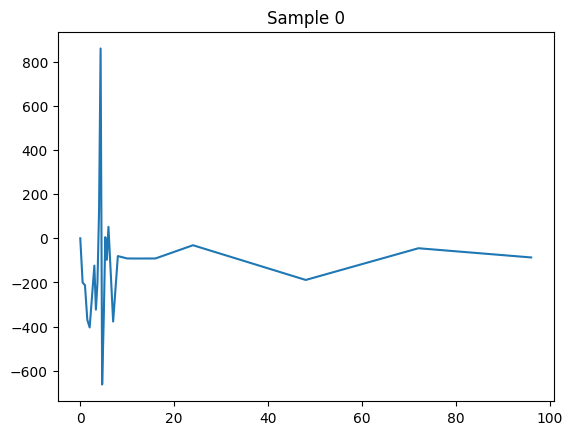

NormaltestResult(statistic=np.float64(21.8111198629371), pvalue=np.float64(1.835589224991958e-05))


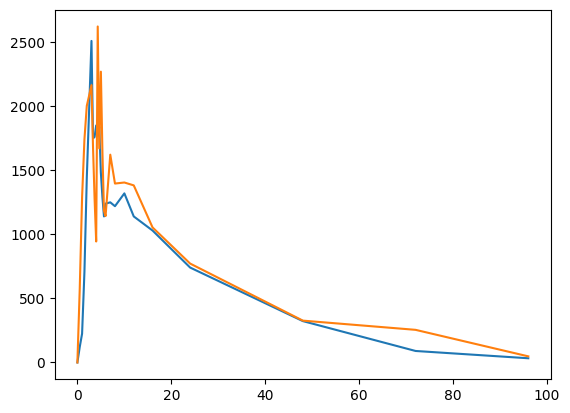

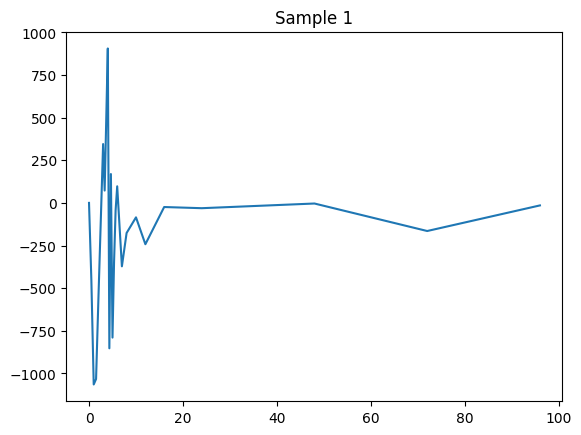

NormaltestResult(statistic=np.float64(0.5889429101640696), pvalue=np.float64(0.7449252098671254))


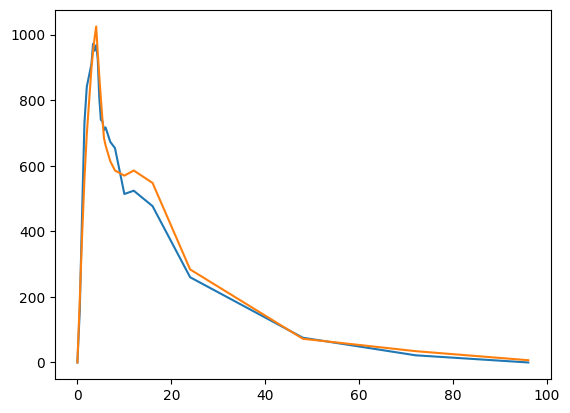

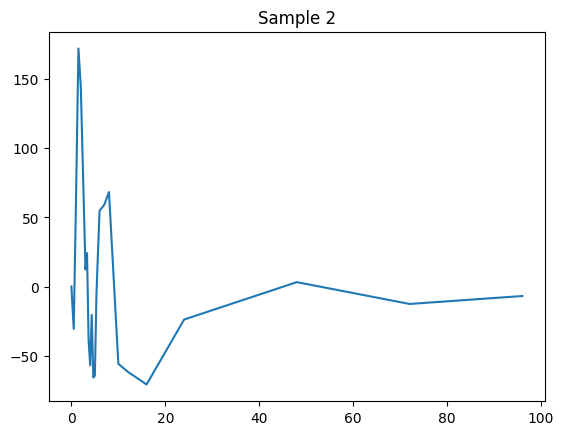

NormaltestResult(statistic=np.float64(6.716128849721908), pvalue=np.float64(0.034802556757376195))


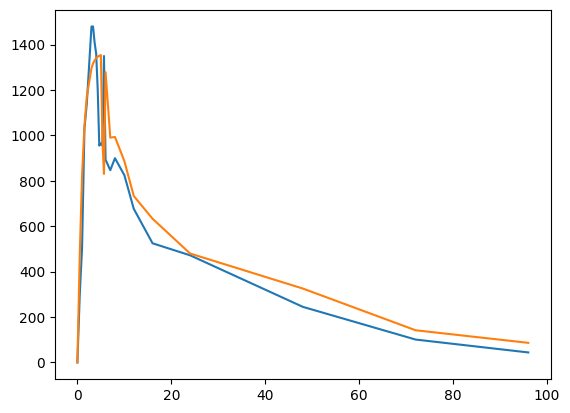

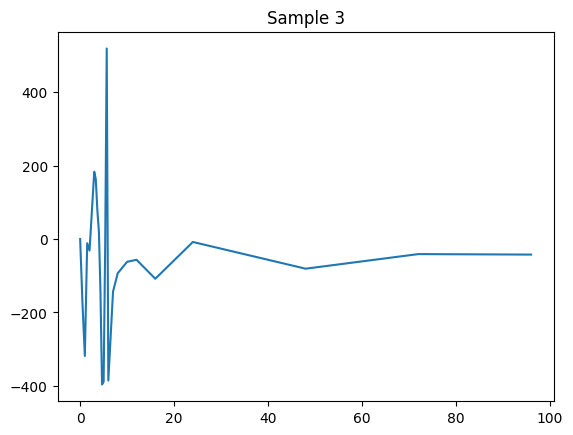

NormaltestResult(statistic=np.float64(6.035975072380409), pvalue=np.float64(0.048899527936891674))


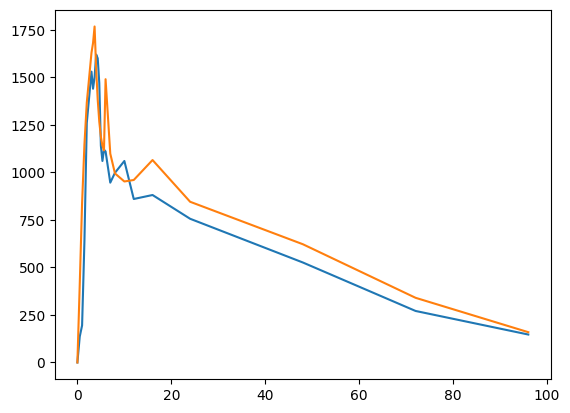

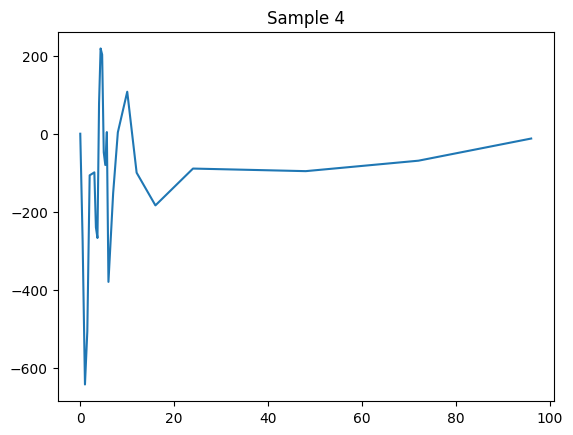

NormaltestResult(statistic=np.float64(4.928710874033515), pvalue=np.float64(0.0850636535874834))


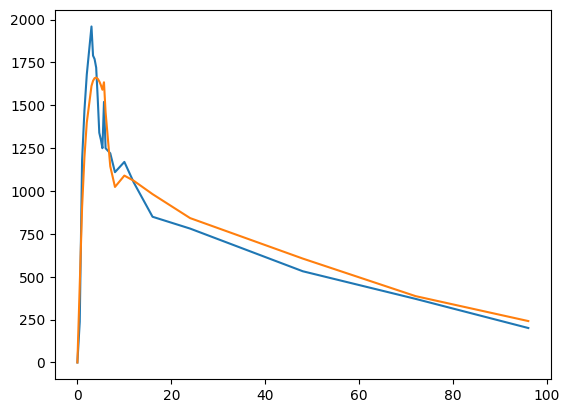

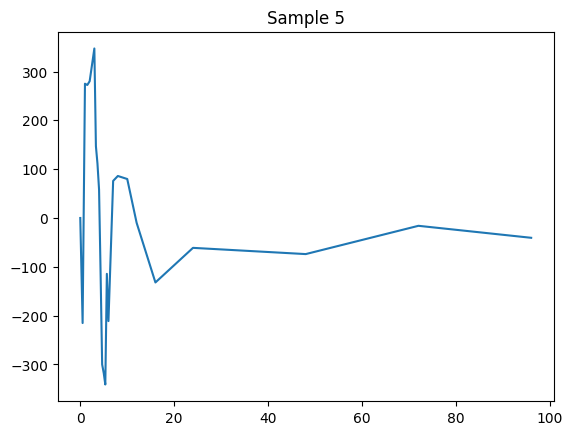

NormaltestResult(statistic=np.float64(0.44981502213166386), pvalue=np.float64(0.7985900760888063))


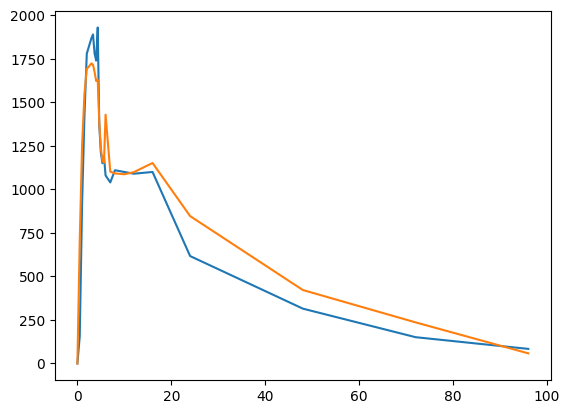

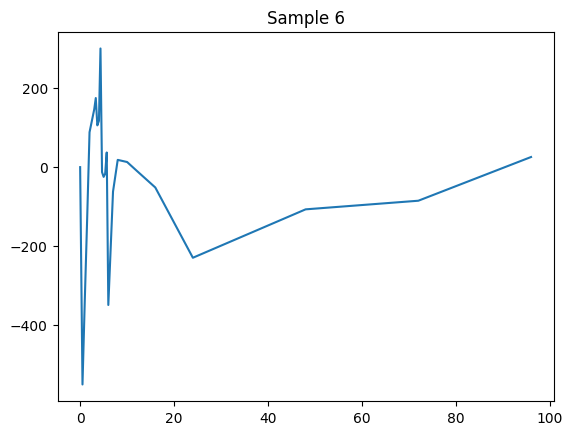

NormaltestResult(statistic=np.float64(7.292911298470139), pvalue=np.float64(0.026083413904741802))


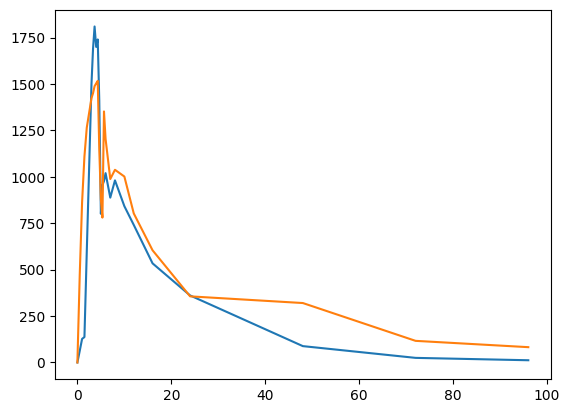

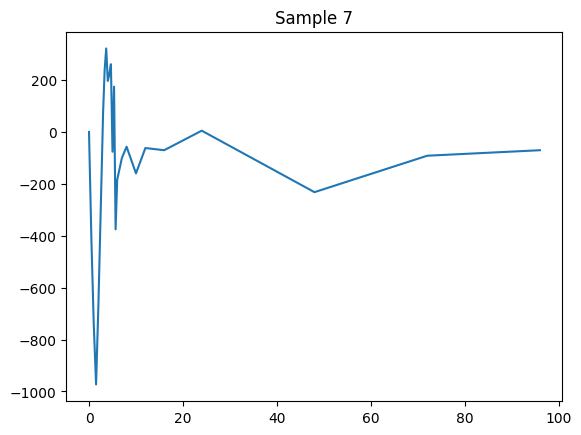

NormaltestResult(statistic=np.float64(6.6114180331326375), pvalue=np.float64(0.03667320070947331))


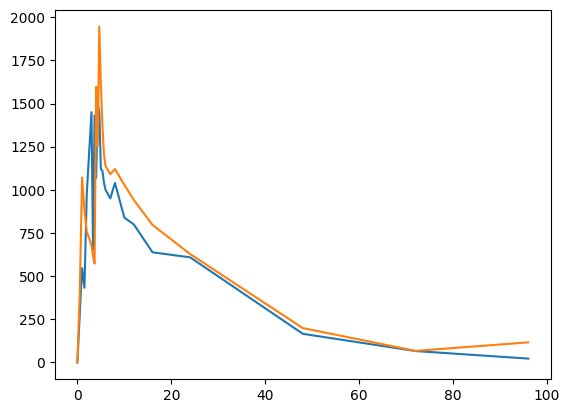

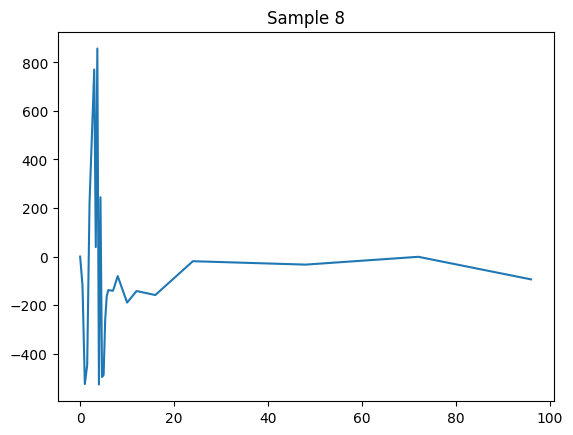

NormaltestResult(statistic=np.float64(10.092698866545161), pvalue=np.float64(0.0064327739051279675))


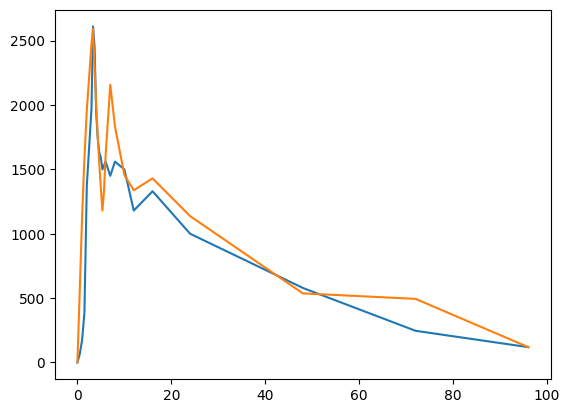

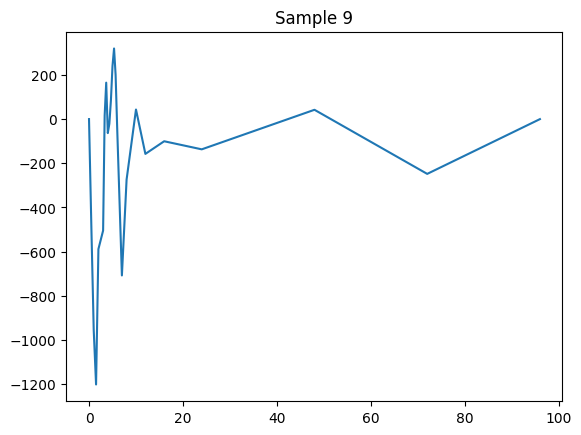

NormaltestResult(statistic=np.float64(7.647542637607364), pvalue=np.float64(0.02184525990844225))


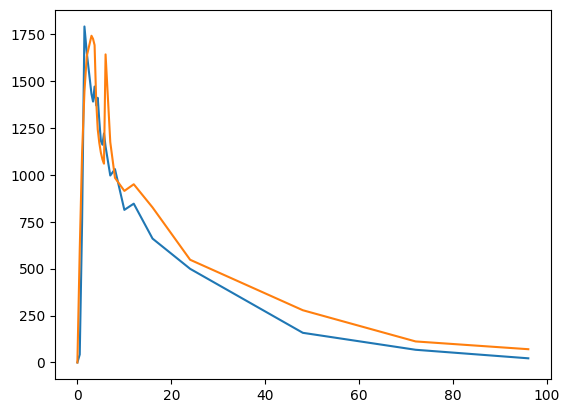

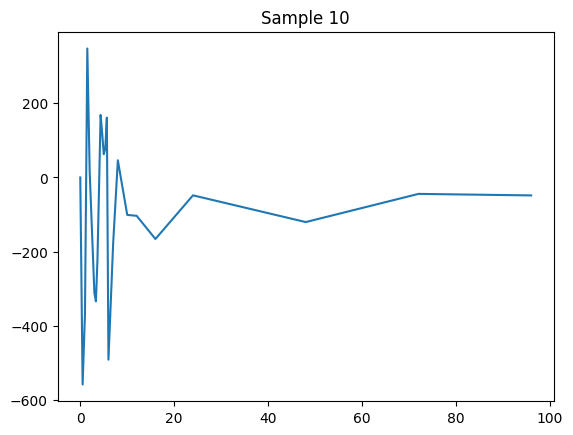

NormaltestResult(statistic=np.float64(0.9579618067744853), pvalue=np.float64(0.6194143132951332))


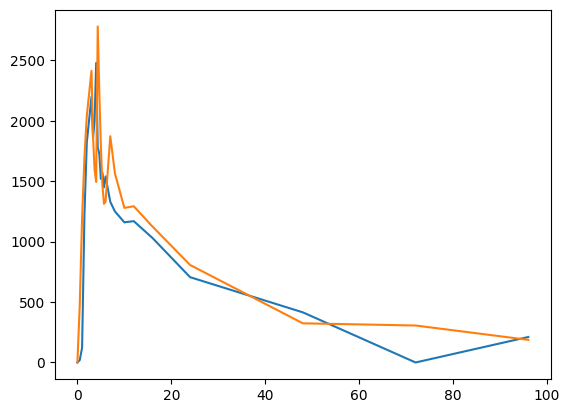

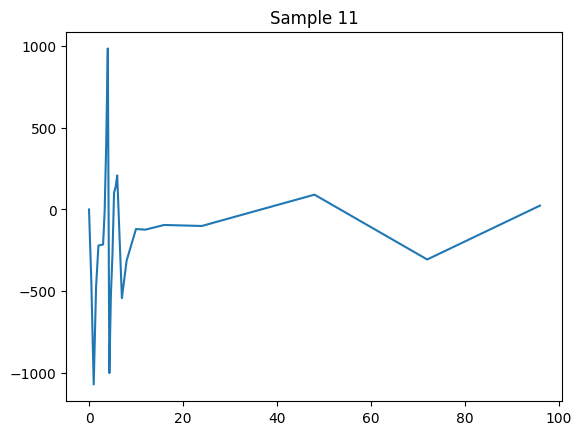

NormaltestResult(statistic=np.float64(3.41688996718463), pvalue=np.float64(0.1811472606792406))


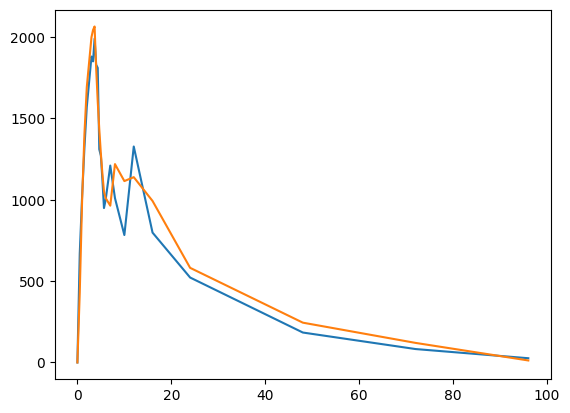

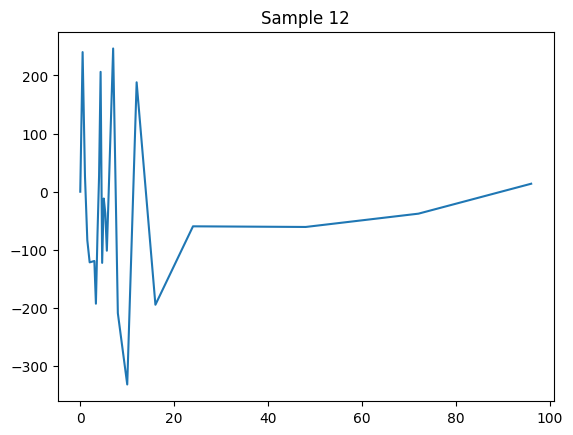

NormaltestResult(statistic=np.float64(1.12561608410119), pvalue=np.float64(0.5696073346917426))


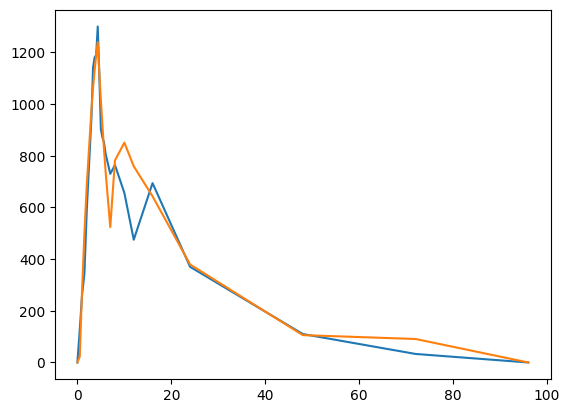

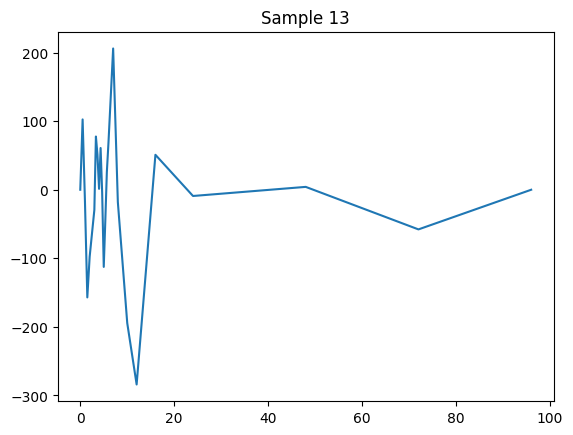

NormaltestResult(statistic=np.float64(4.2705471449333805), pvalue=np.float64(0.11821224633679439))


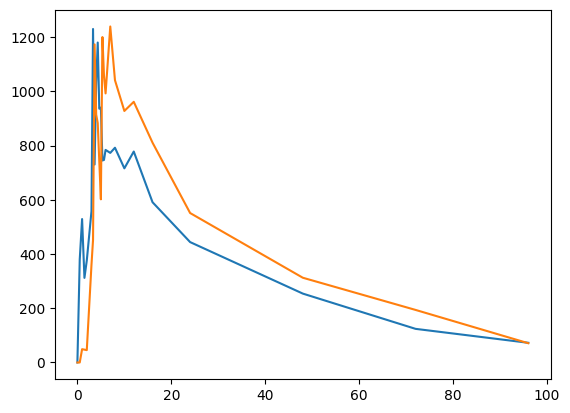

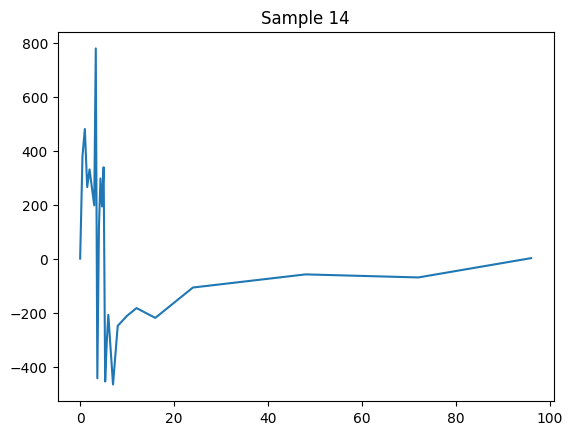

NormaltestResult(statistic=np.float64(0.8282016229488124), pvalue=np.float64(0.6609343181441795))


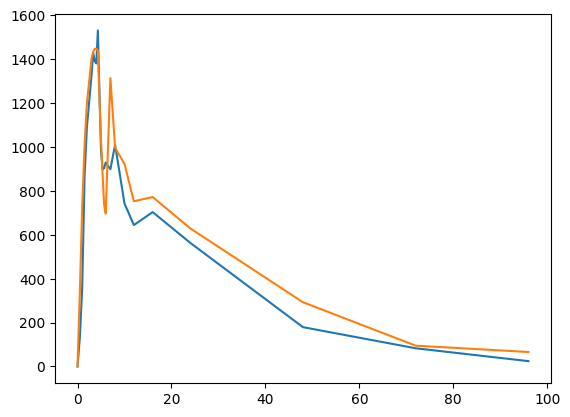

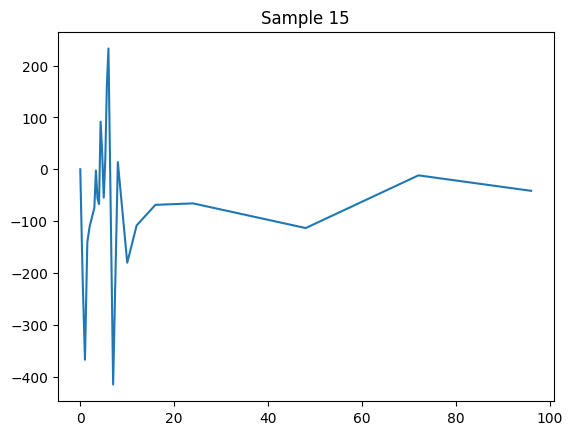

NormaltestResult(statistic=np.float64(3.910518556541437), pvalue=np.float64(0.14152777685936205))


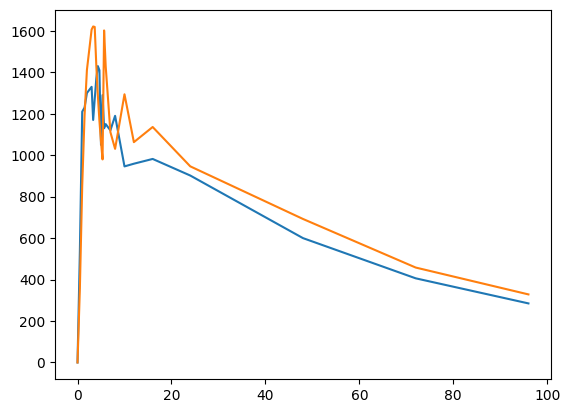

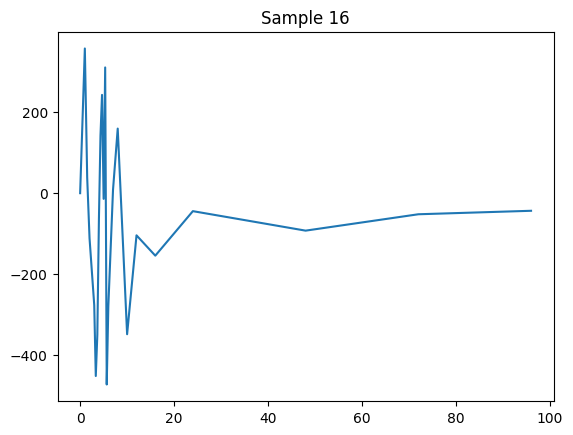

NormaltestResult(statistic=np.float64(0.18818267893182902), pvalue=np.float64(0.9101996212965152))


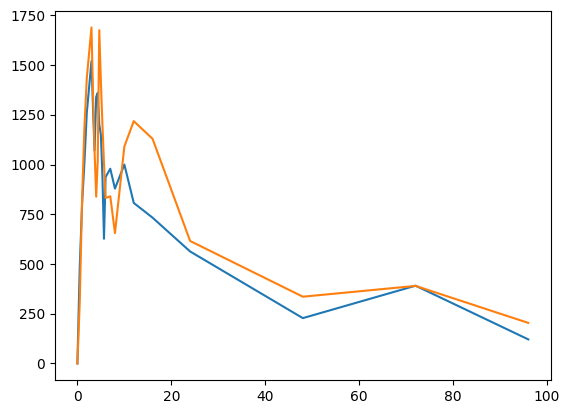

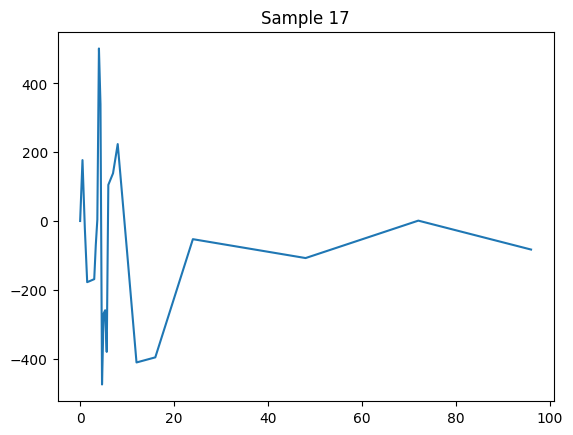

NormaltestResult(statistic=np.float64(0.9733110514620789), pvalue=np.float64(0.6146787374878953))


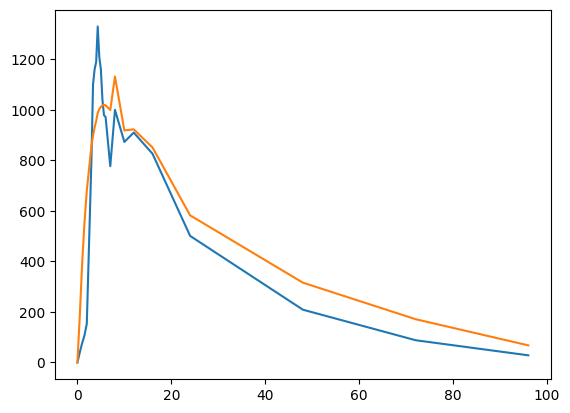

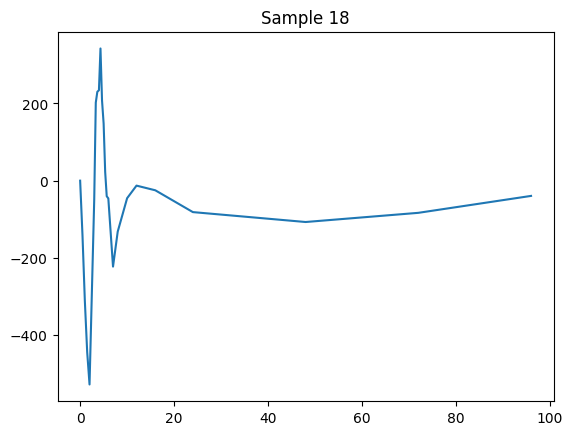

NormaltestResult(statistic=np.float64(1.5943684024468583), pvalue=np.float64(0.45059596704015814))


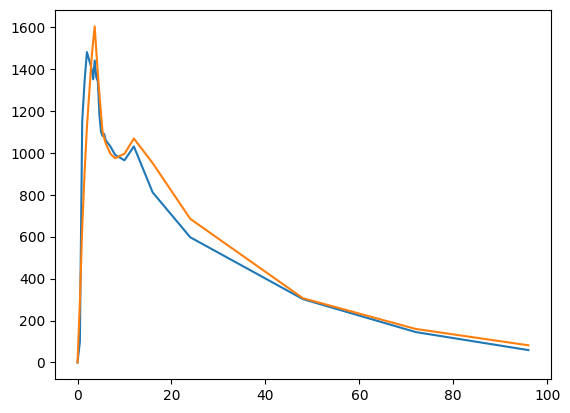

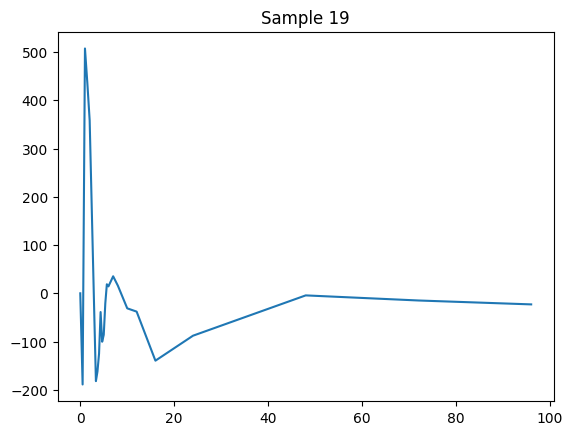

NormaltestResult(statistic=np.float64(16.619181152708357), pvalue=np.float64(0.00024614480023608026))


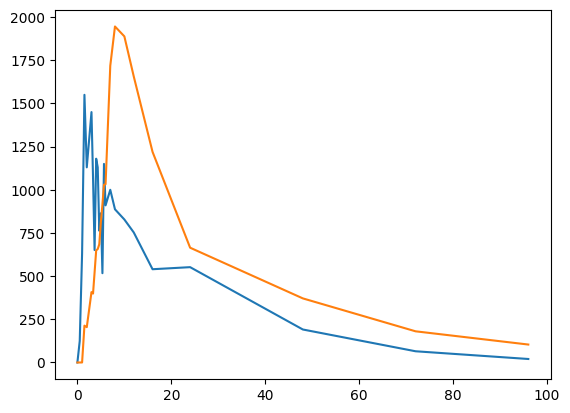

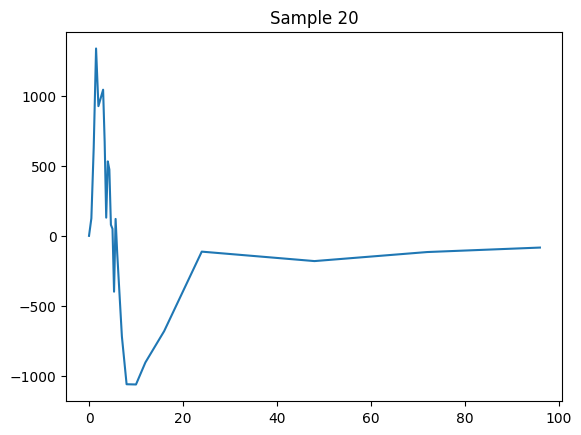

NormaltestResult(statistic=np.float64(0.07079248784037401), pvalue=np.float64(0.9652228767765517))


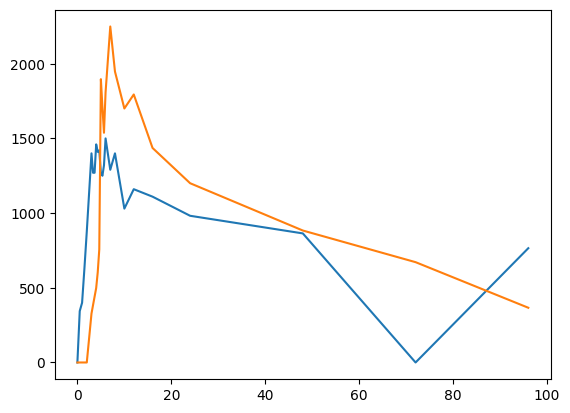

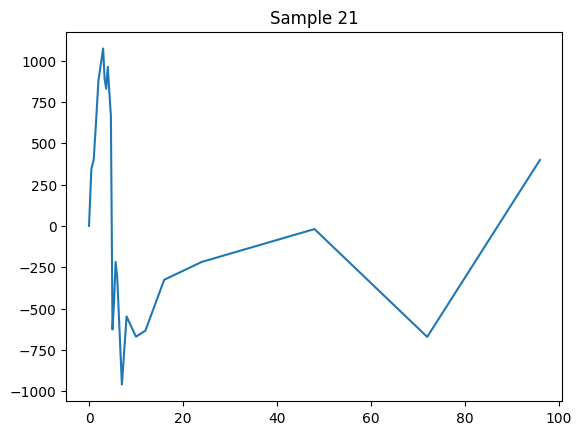

NormaltestResult(statistic=np.float64(8.909173206707575), pvalue=np.float64(0.011625124668969538))


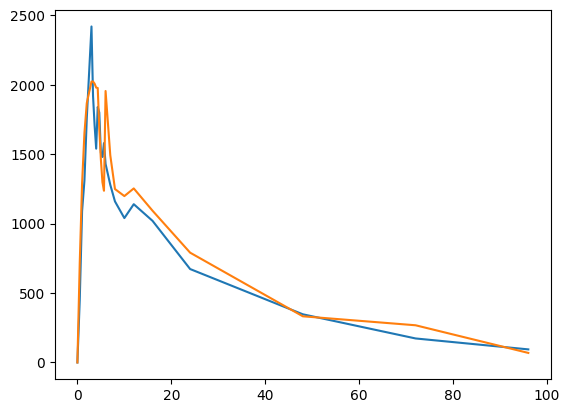

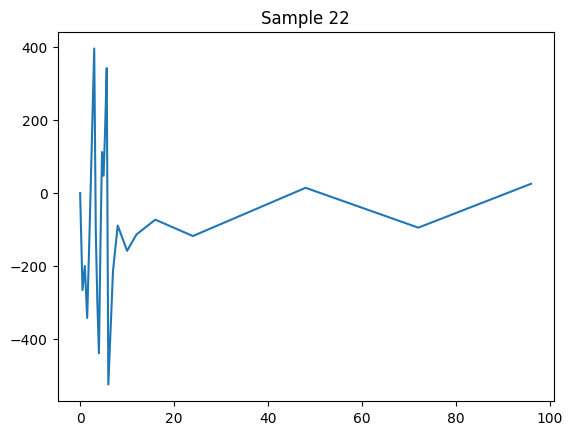

NormaltestResult(statistic=np.float64(1.3011716227990067), pvalue=np.float64(0.5217400459529664))


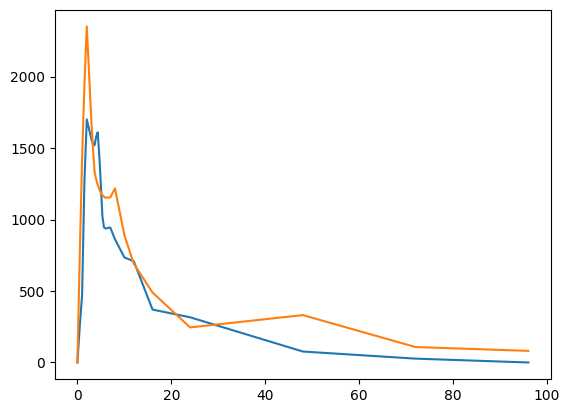

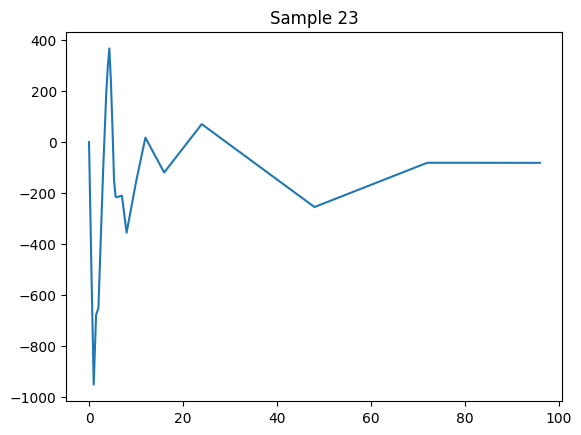

NormaltestResult(statistic=np.float64(3.8854936896975776), pvalue=np.float64(0.14330975896186401))


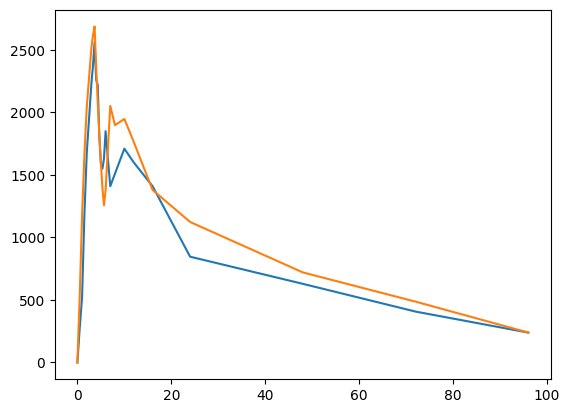

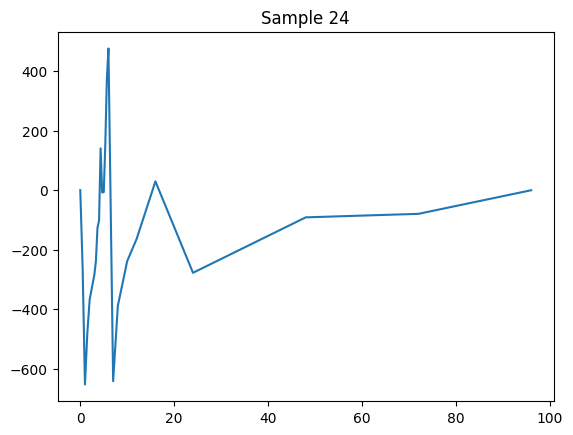

NormaltestResult(statistic=np.float64(0.4868266367253189), pvalue=np.float64(0.7839474269337383))


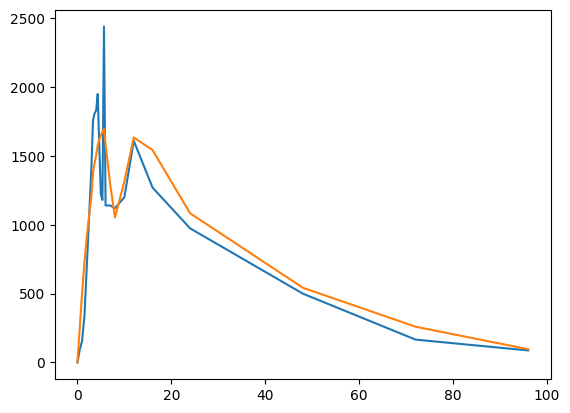

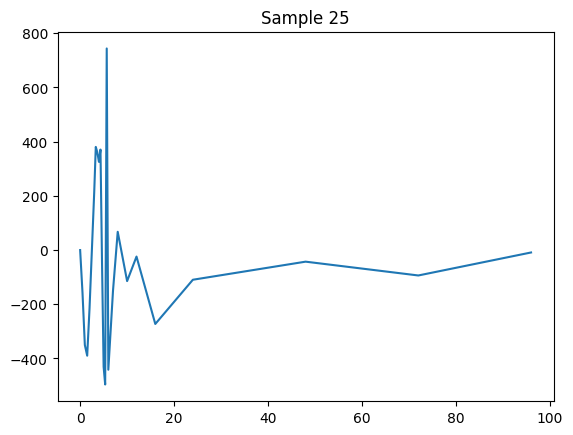

NormaltestResult(statistic=np.float64(2.423417418918218), pvalue=np.float64(0.29768818199151637))


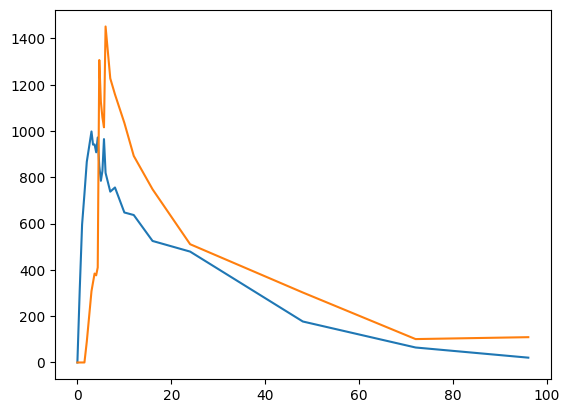

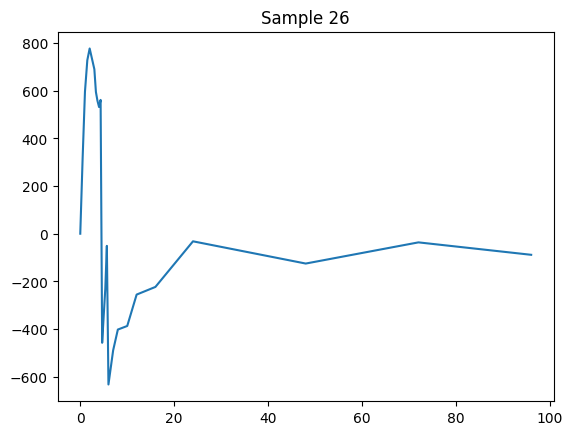

NormaltestResult(statistic=np.float64(7.826869620747308), pvalue=np.float64(0.019971783823645194))


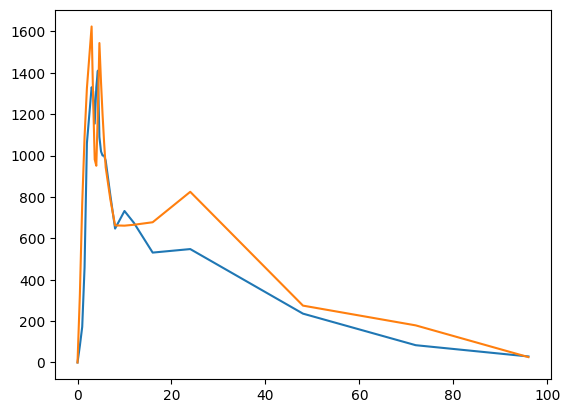

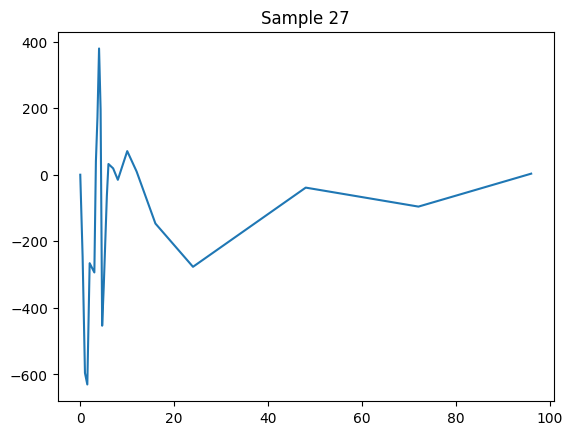

NormaltestResult(statistic=np.float64(1.0130549151194186), pvalue=np.float64(0.602584449942662))


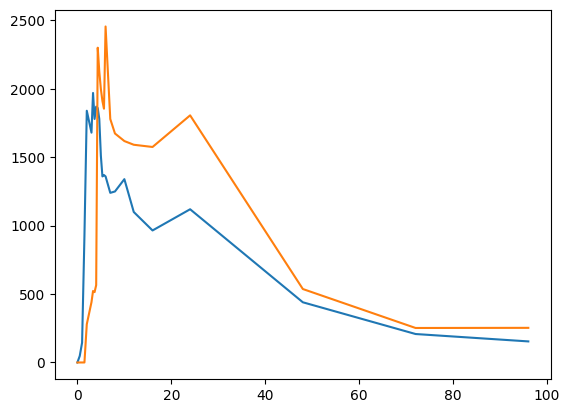

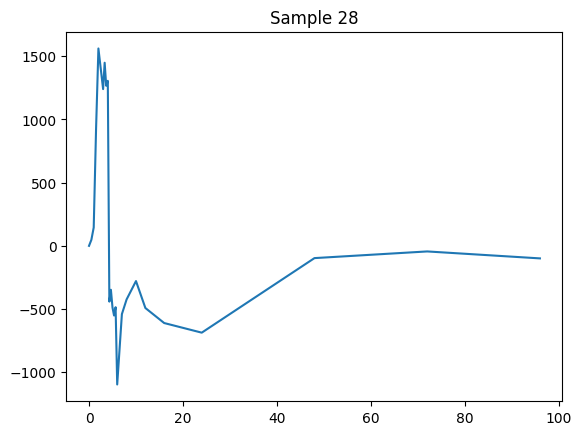

NormaltestResult(statistic=np.float64(3.687639642294939), pvalue=np.float64(0.15821192912541357))


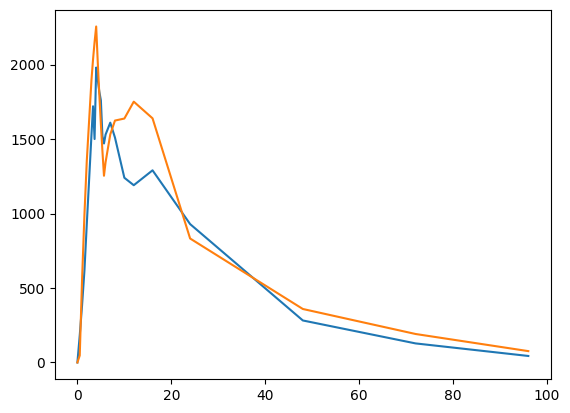

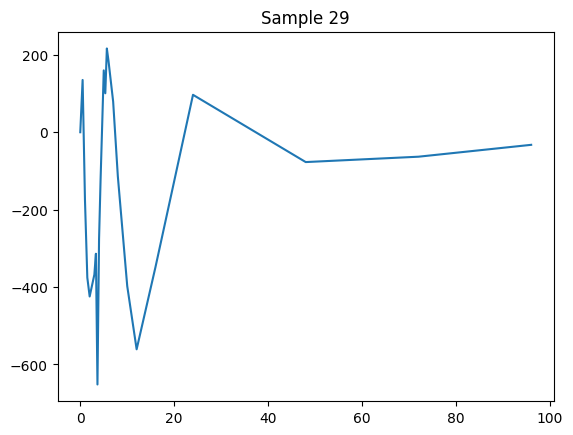

NormaltestResult(statistic=np.float64(2.032838260268531), pvalue=np.float64(0.36188849837764314))


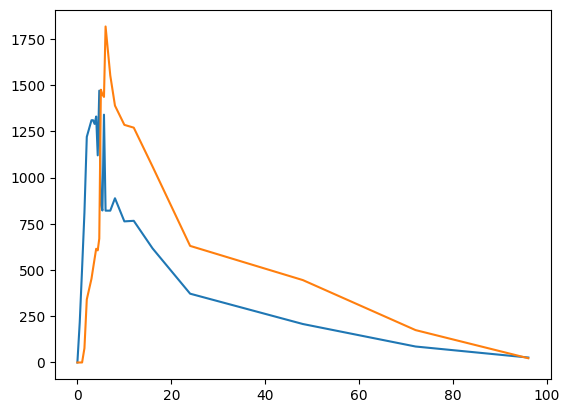

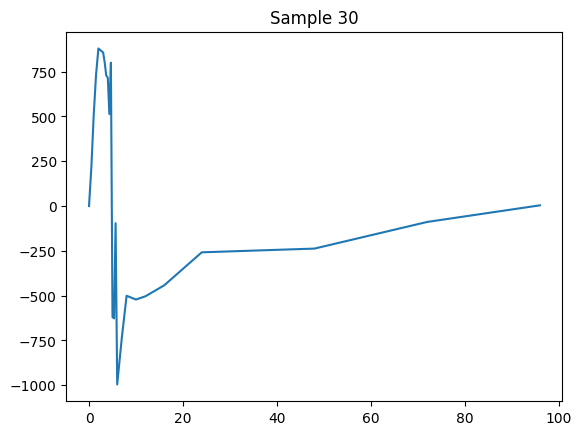

NormaltestResult(statistic=np.float64(7.71950923387407), pvalue=np.float64(0.02107316988762895))


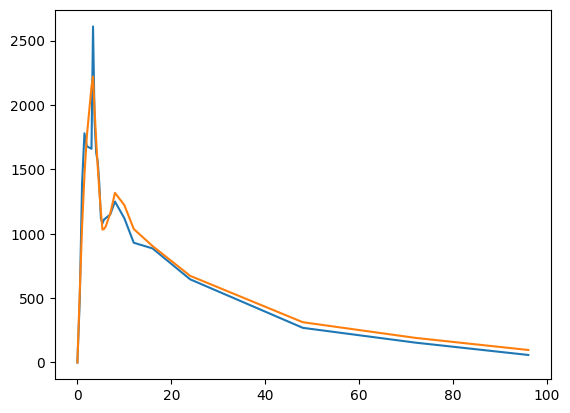

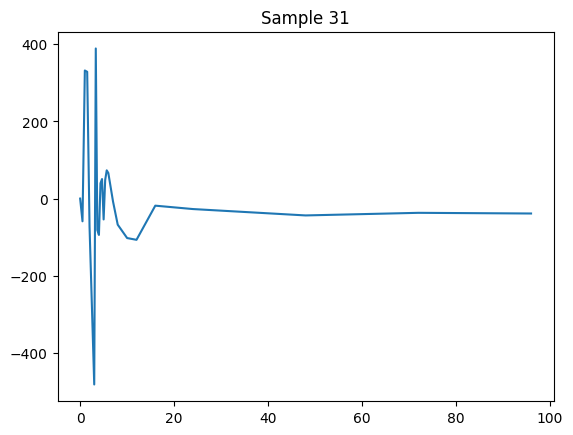

NormaltestResult(statistic=np.float64(5.491069291111065), pvalue=np.float64(0.0642139600568721))


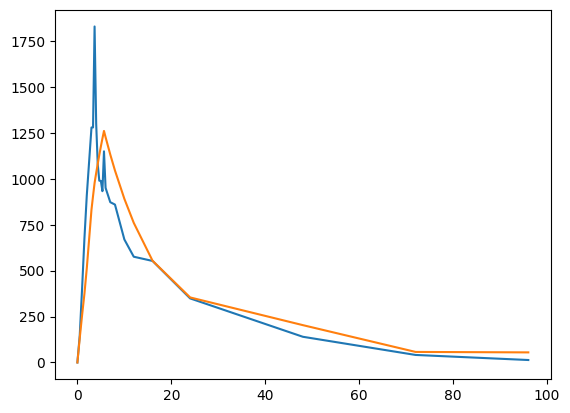

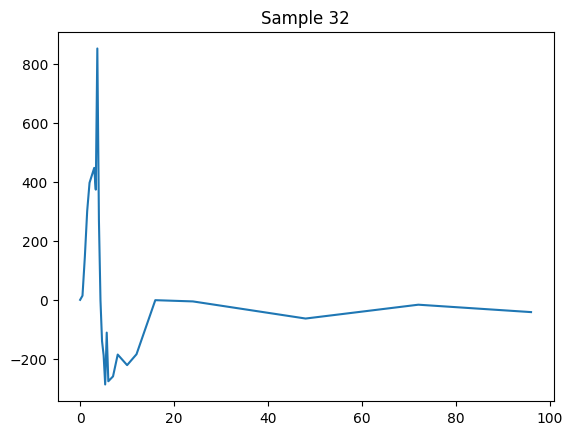

NormaltestResult(statistic=np.float64(9.216415533412821), pvalue=np.float64(0.009969670280622955))


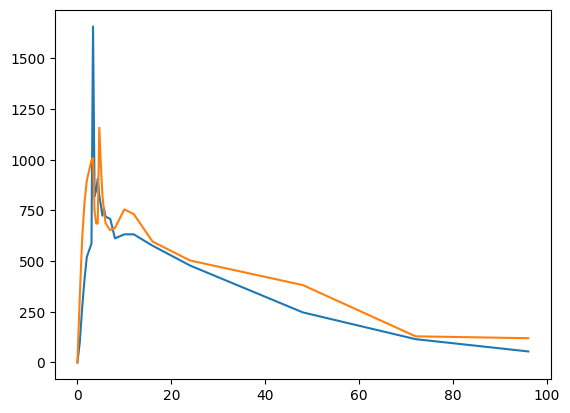

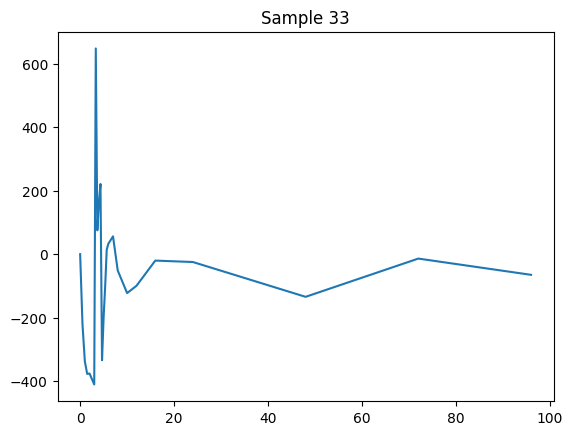

NormaltestResult(statistic=np.float64(9.962105793445303), pvalue=np.float64(0.0068668286884849316))


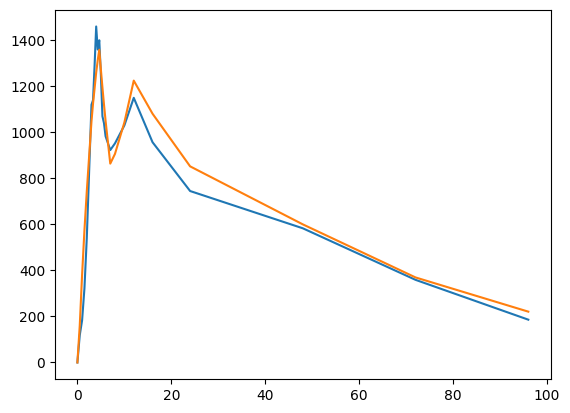

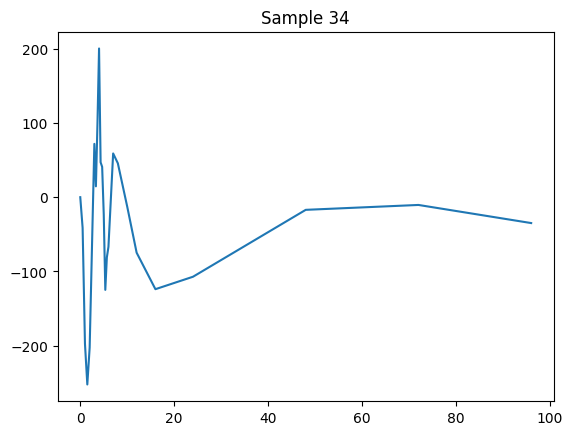

NormaltestResult(statistic=np.float64(0.4902237341658563), pvalue=np.float64(0.7826169842656757))


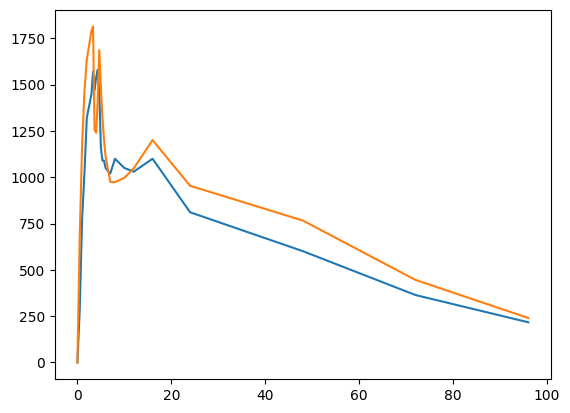

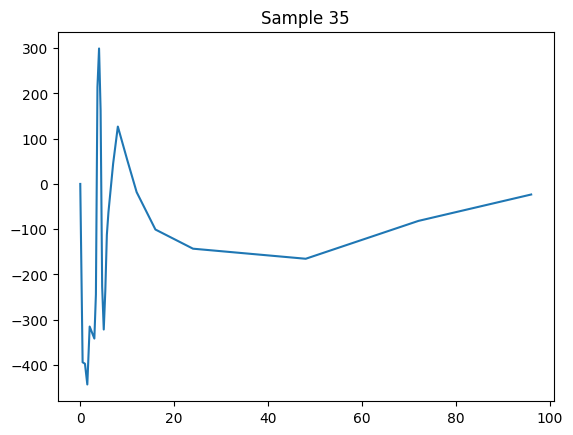

NormaltestResult(statistic=np.float64(0.8550350441329224), pvalue=np.float64(0.6521259753013496))


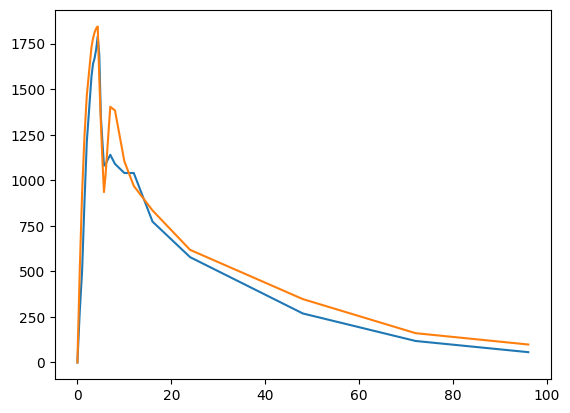

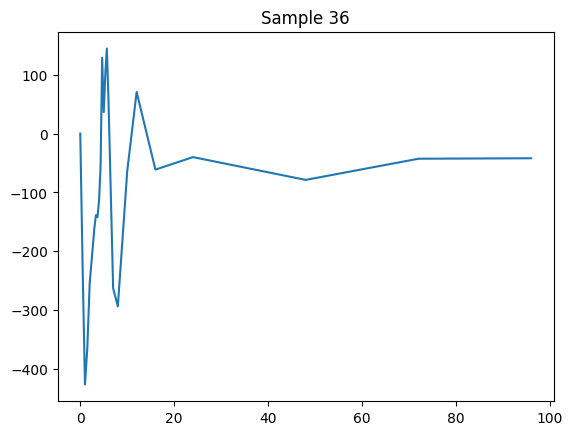

NormaltestResult(statistic=np.float64(1.0690825268536677), pvalue=np.float64(0.5859380197012887))


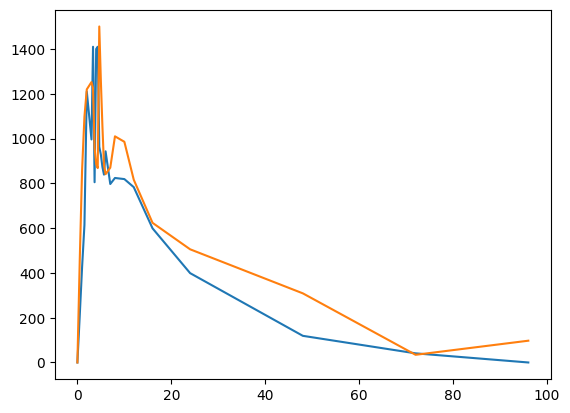

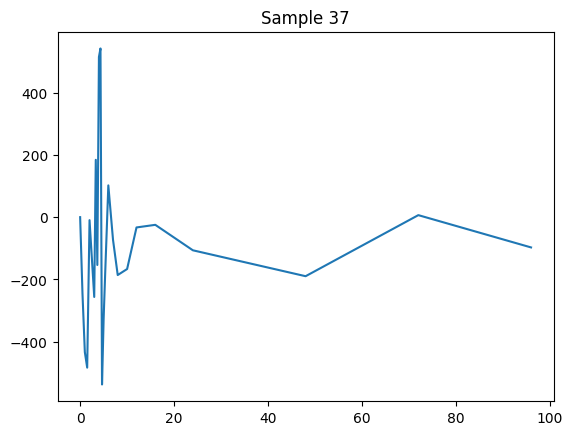

NormaltestResult(statistic=np.float64(5.25000192474004), pvalue=np.float64(0.07243968732043457))


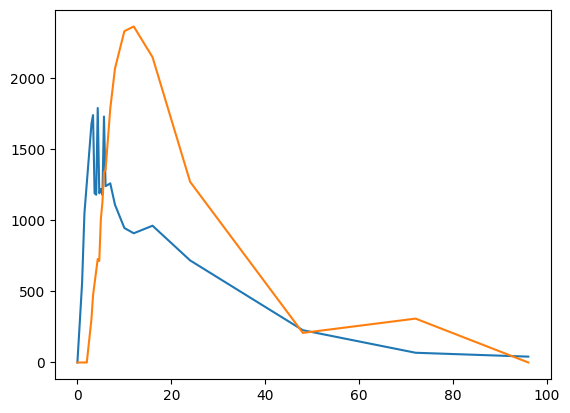

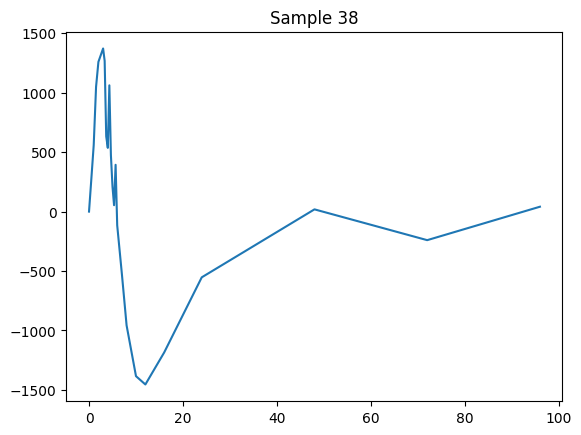

NormaltestResult(statistic=np.float64(0.9094966262282339), pvalue=np.float64(0.634607670278184))


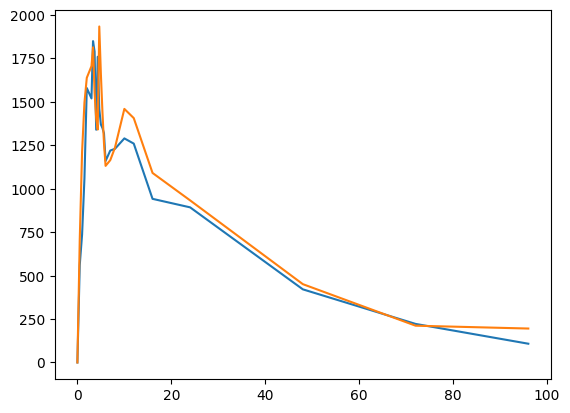

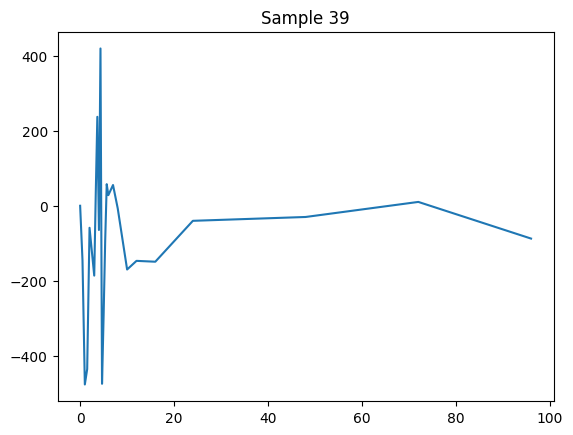

NormaltestResult(statistic=np.float64(1.701727844430772), pvalue=np.float64(0.42704583815095043))


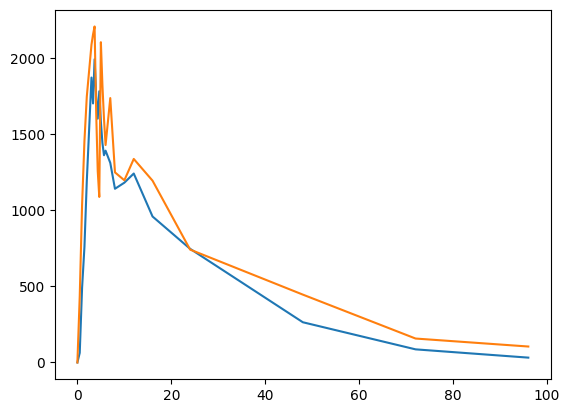

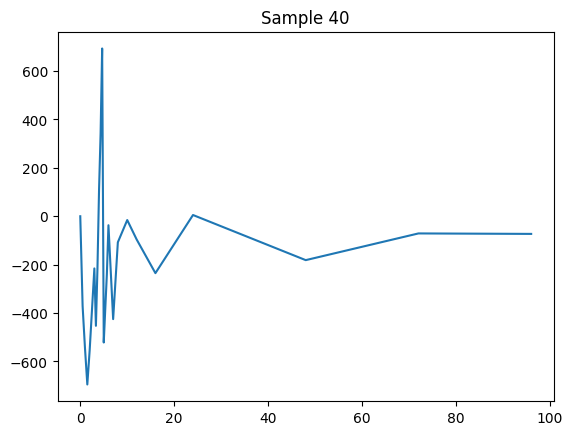

NormaltestResult(statistic=np.float64(6.066281666120993), pvalue=np.float64(0.048164124836032086))


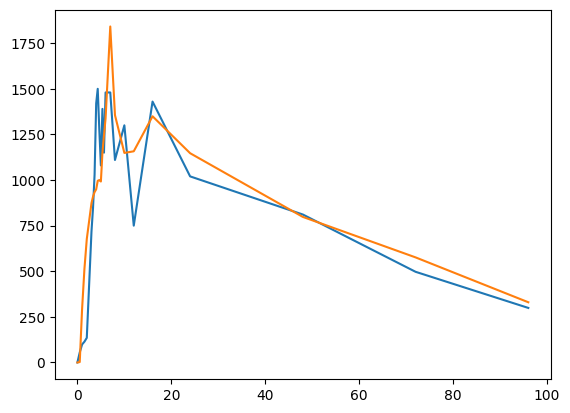

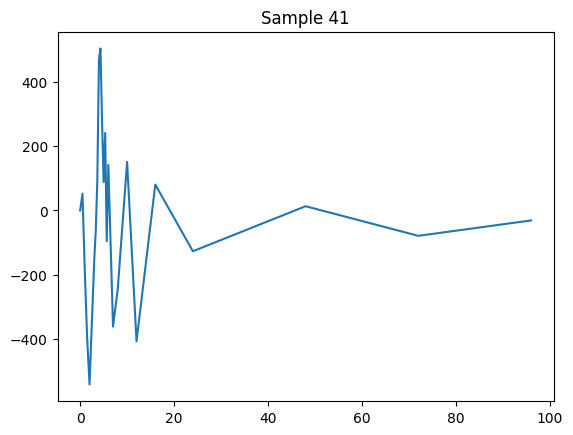

NormaltestResult(statistic=np.float64(0.06215230331246719), pvalue=np.float64(0.9694017487164175))


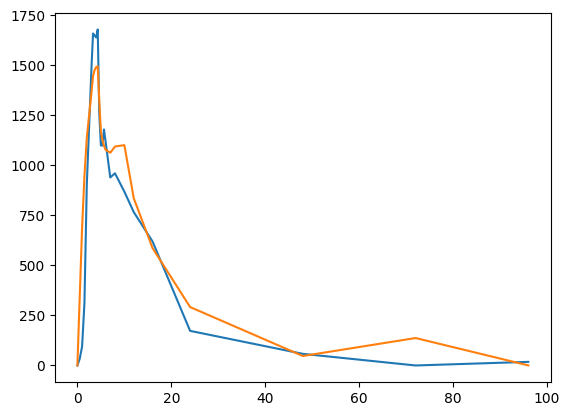

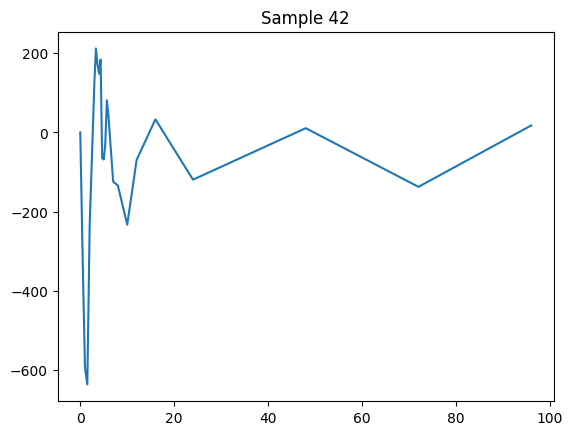

NormaltestResult(statistic=np.float64(8.799517821716943), pvalue=np.float64(0.012280300193238497))


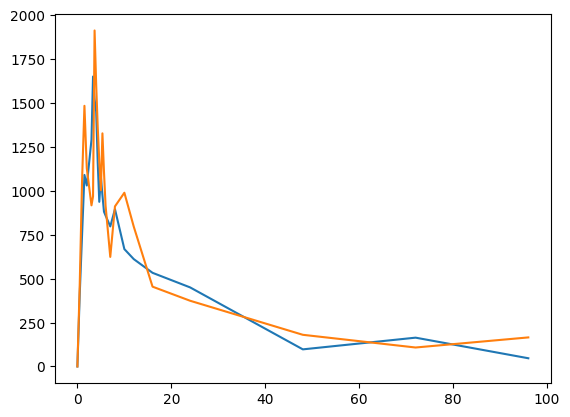

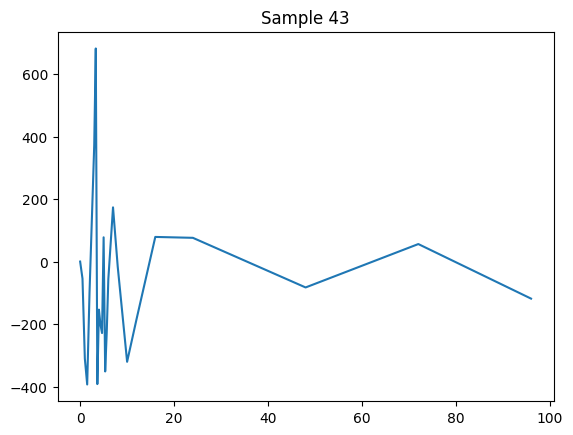

NormaltestResult(statistic=np.float64(10.746510295514351), pvalue=np.float64(0.004639006056011343))


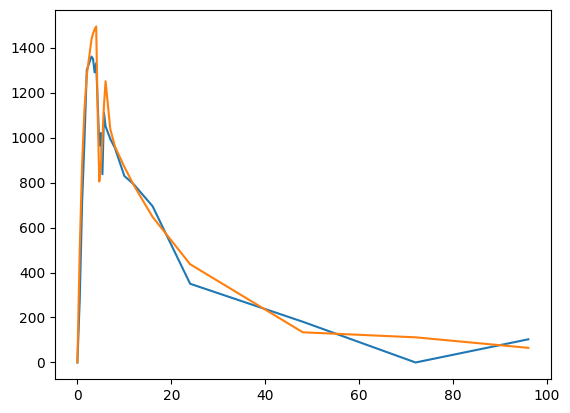

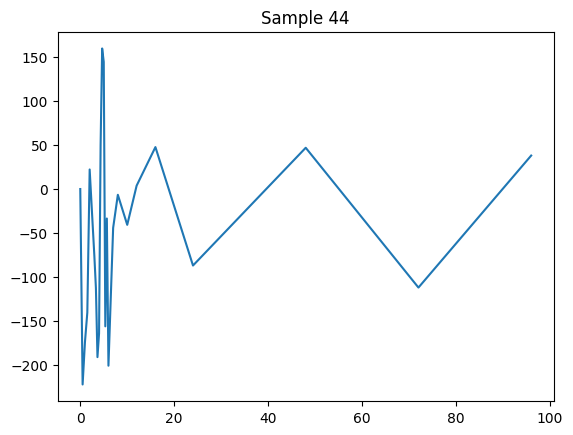

NormaltestResult(statistic=np.float64(0.9004131470358309), pvalue=np.float64(0.6374964481350655))


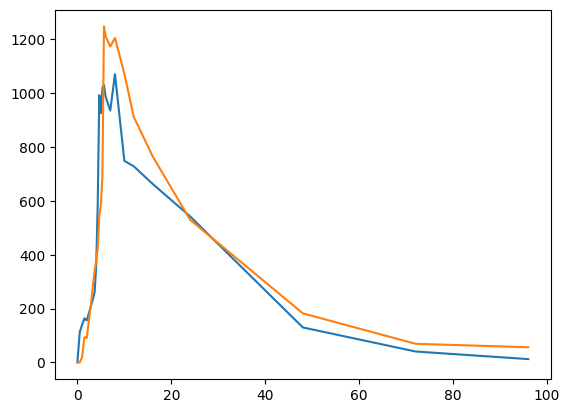

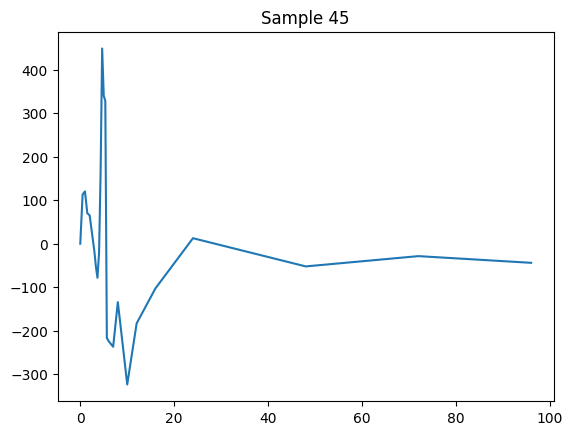

NormaltestResult(statistic=np.float64(2.7554300756049206), pvalue=np.float64(0.2521540577960983))


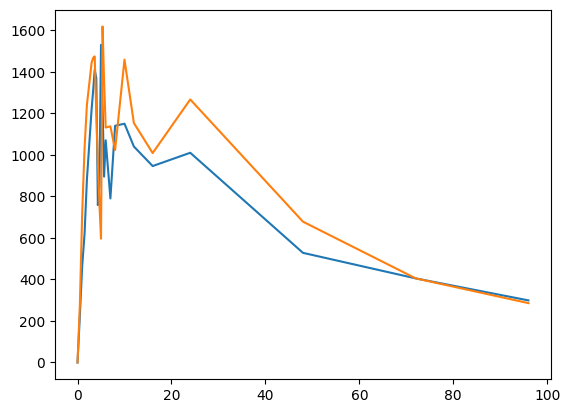

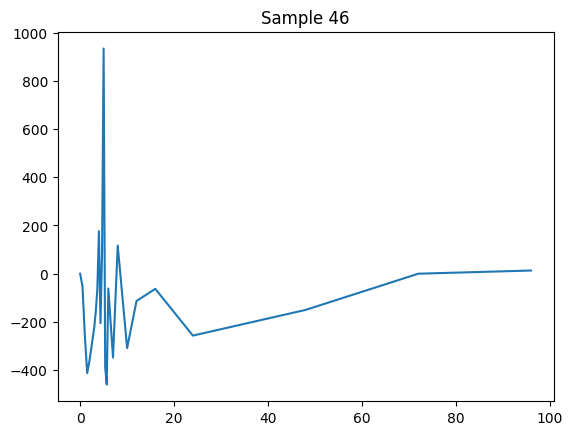

NormaltestResult(statistic=np.float64(26.22702358278047), pvalue=np.float64(2.0177817542912447e-06))


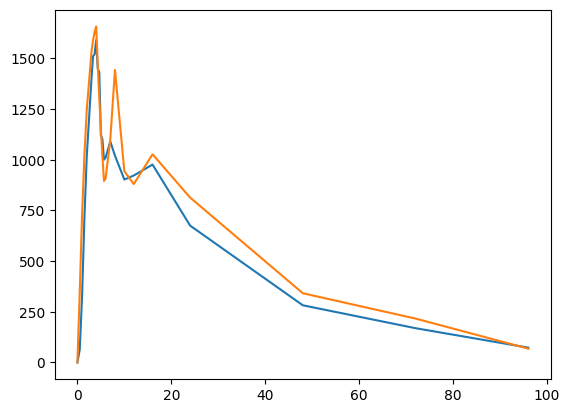

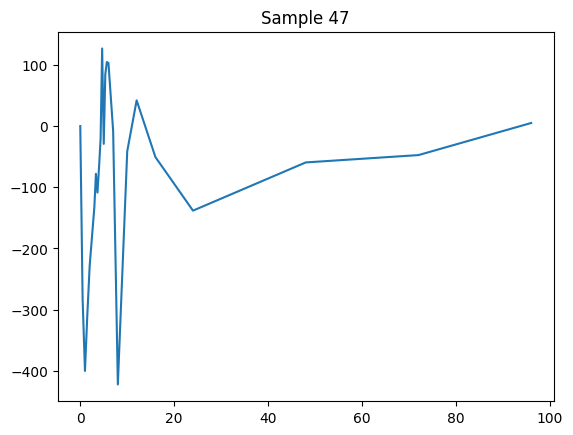

NormaltestResult(statistic=np.float64(3.8304912308642343), pvalue=np.float64(0.14730564760225948))


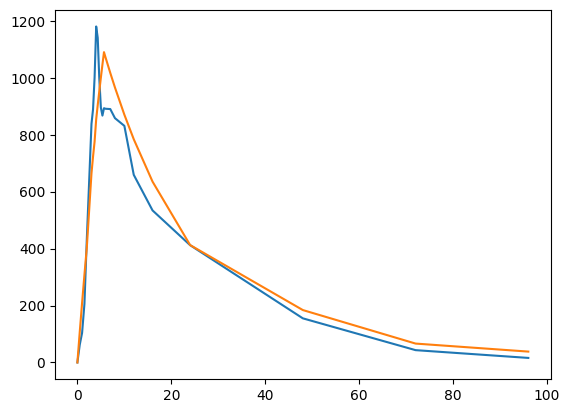

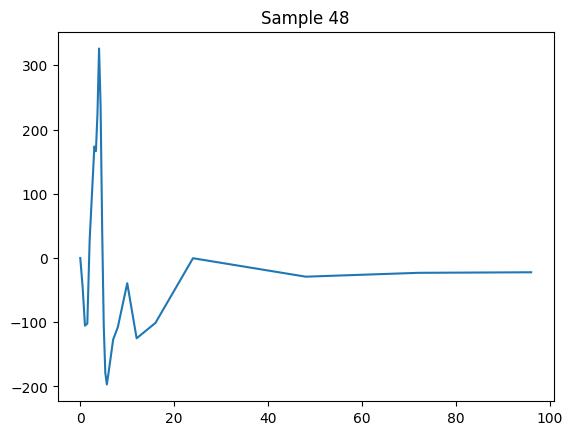

NormaltestResult(statistic=np.float64(3.9708191808832733), pvalue=np.float64(0.1373243558527559))


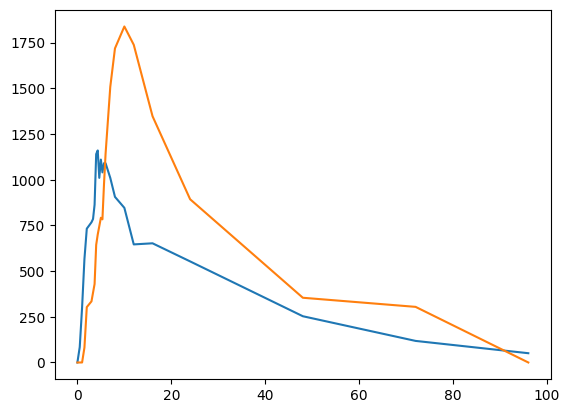

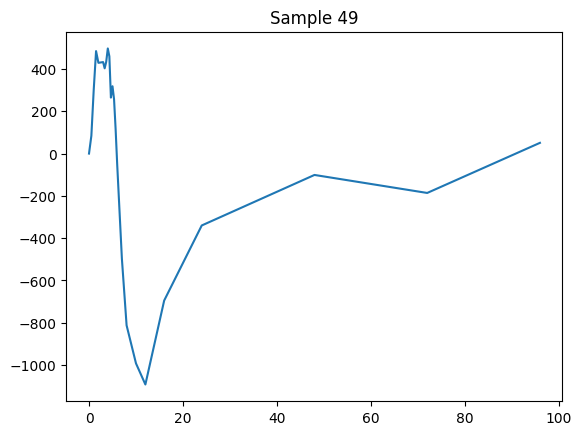

NormaltestResult(statistic=np.float64(4.168736154855469), pvalue=np.float64(0.12438569746567535))


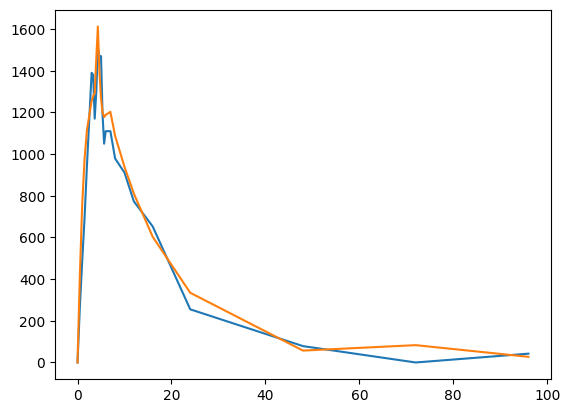

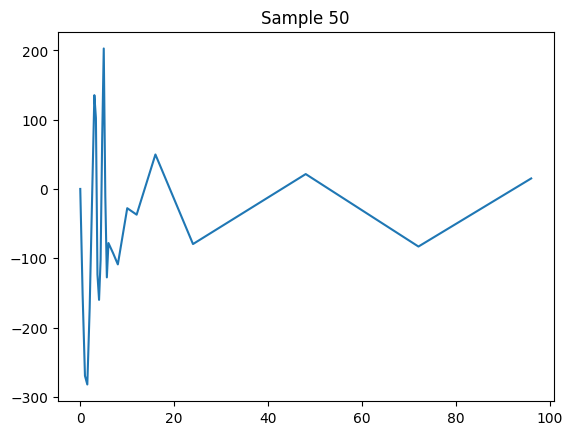

NormaltestResult(statistic=np.float64(0.1988160869539493), pvalue=np.float64(0.9053732010123119))


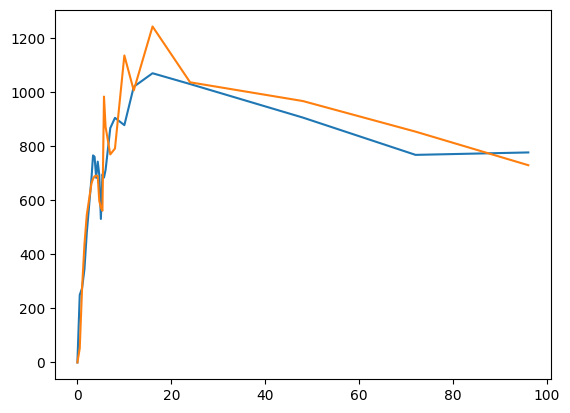

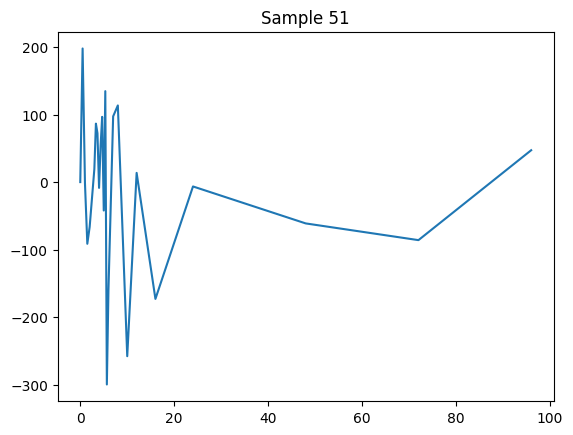

NormaltestResult(statistic=np.float64(2.676801615326703), pvalue=np.float64(0.26226474516962645))


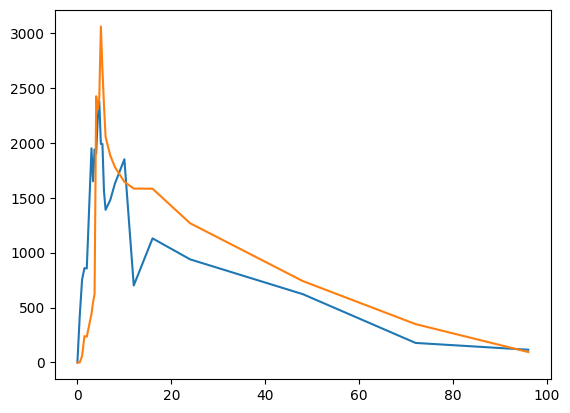

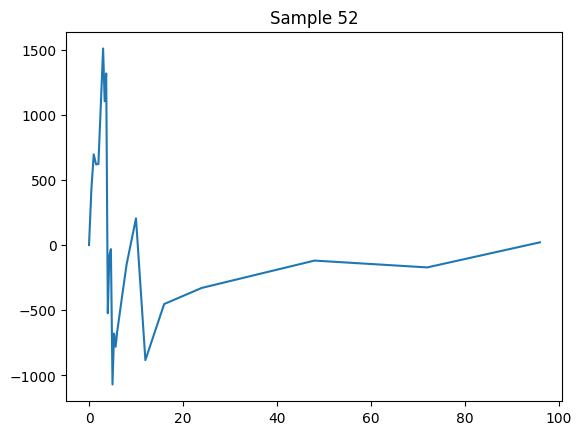

NormaltestResult(statistic=np.float64(1.8732943262144808), pvalue=np.float64(0.39193974485654515))


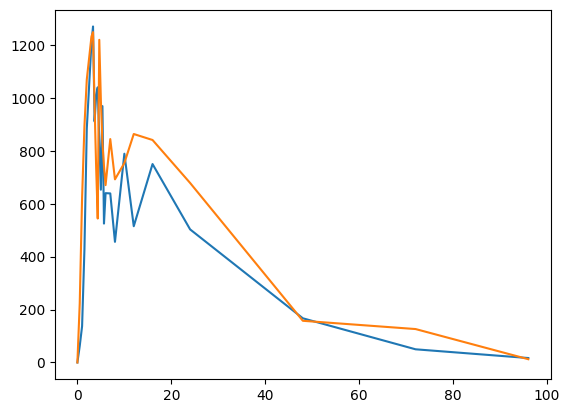

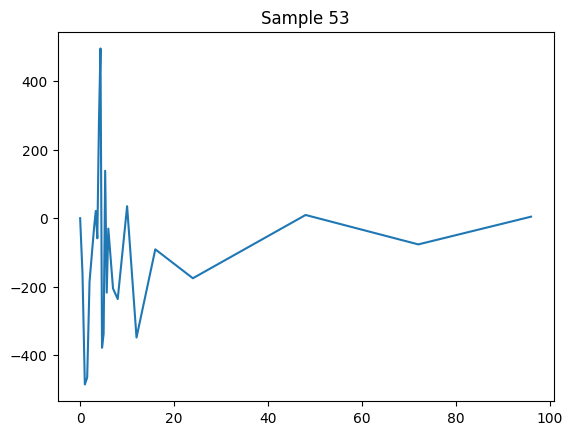

NormaltestResult(statistic=np.float64(3.029085317664091), pvalue=np.float64(0.21990873517089446))


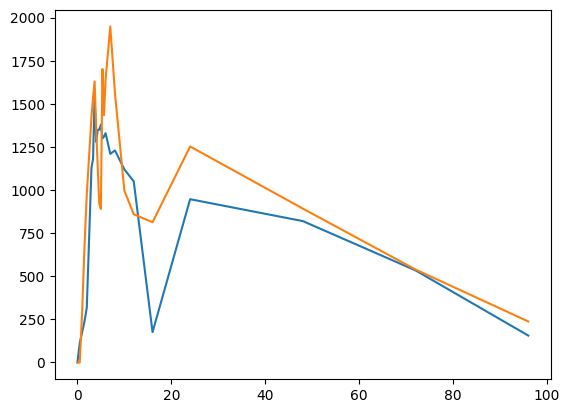

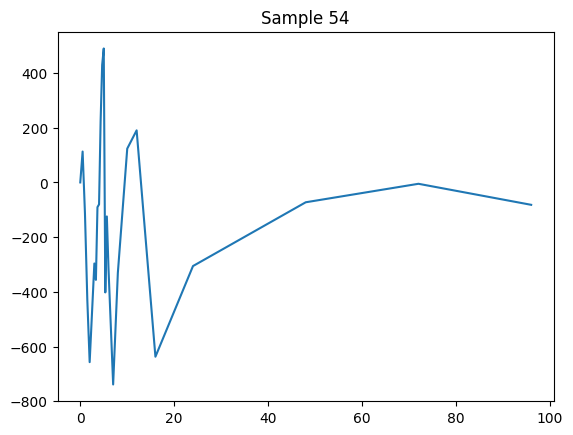

NormaltestResult(statistic=np.float64(0.027587759218247777), pvalue=np.float64(0.9863008200230472))


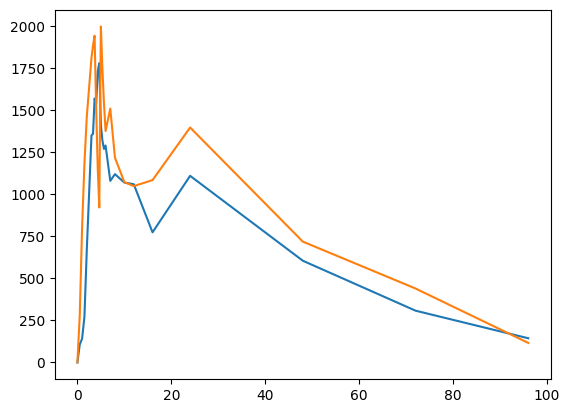

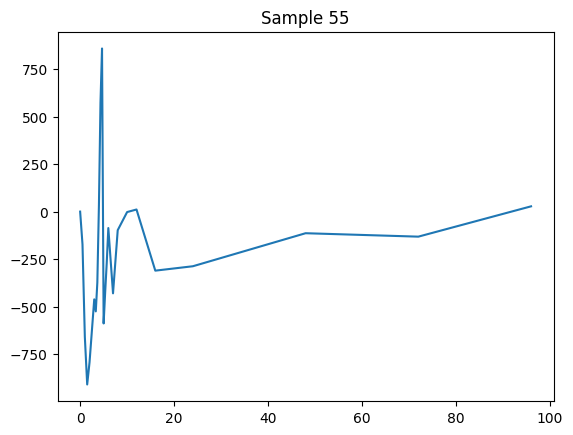

NormaltestResult(statistic=np.float64(5.7362998653022), pvalue=np.float64(0.056803920505599556))


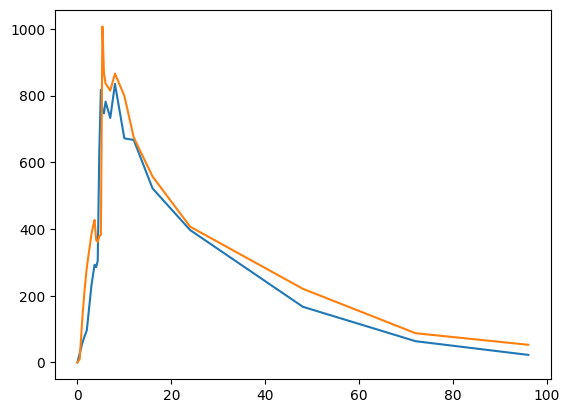

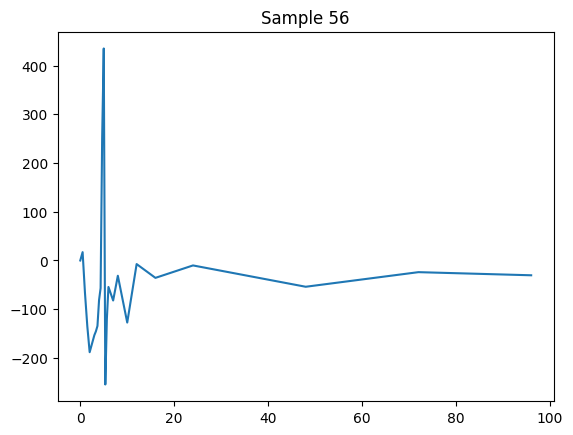

NormaltestResult(statistic=np.float64(23.910104446746246), pvalue=np.float64(6.426681667018134e-06))


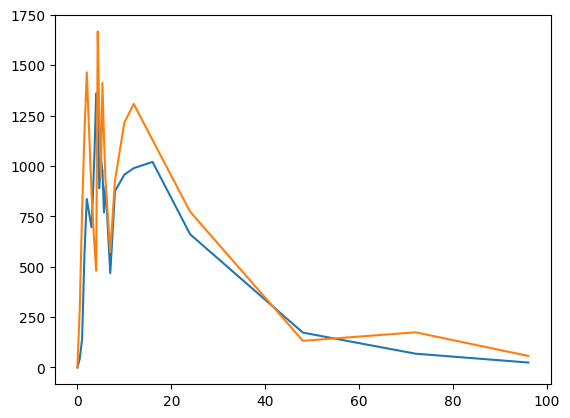

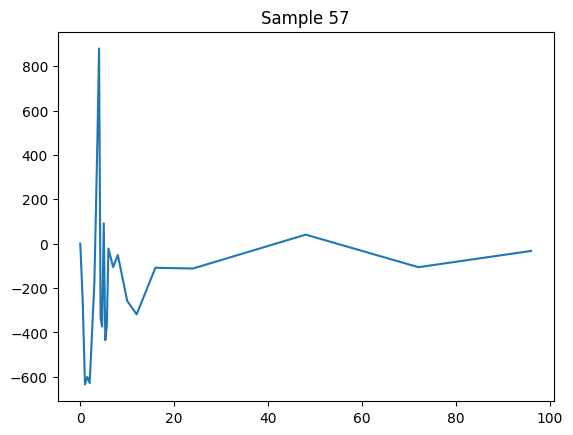

NormaltestResult(statistic=np.float64(9.668401629717238), pvalue=np.float64(0.007953041738634706))


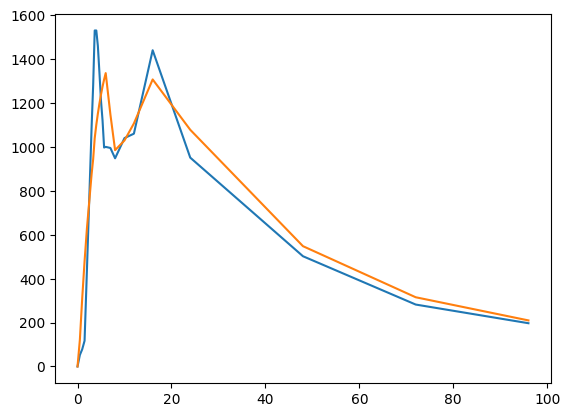

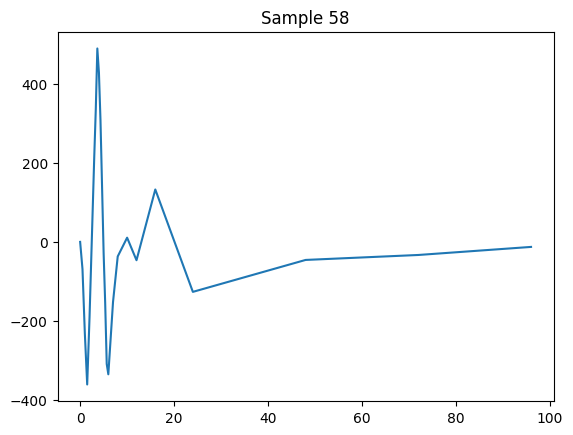

NormaltestResult(statistic=np.float64(1.5267819069651036), pvalue=np.float64(0.46608327762053026))


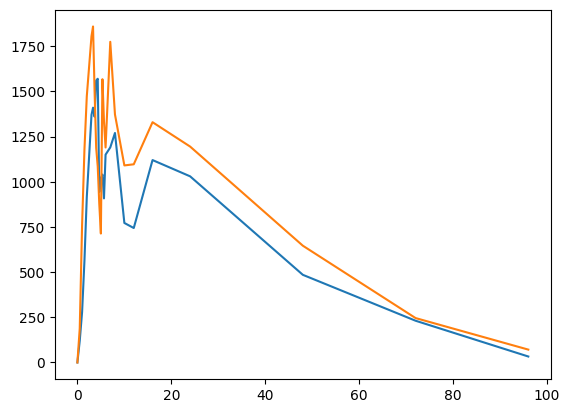

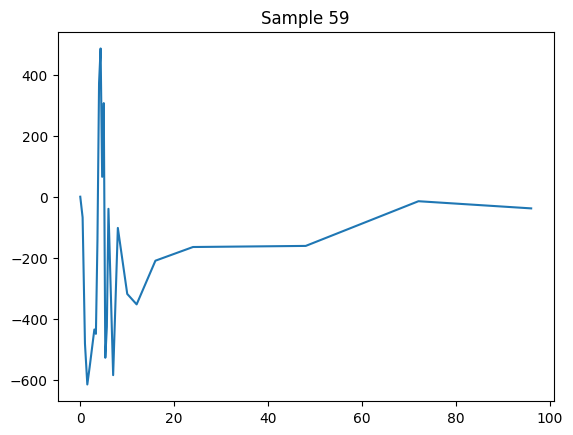

NormaltestResult(statistic=np.float64(1.3940273479940386), pvalue=np.float64(0.4980704859120575))


In [7]:
for i,(t, X) in enumerate(samples):
    model = EnsembledPBFTPK(n_models=20, alpha=9.0)
    model.fit(t, X)
    X_sample = model.sample(t)
    plt.plot(t, X)
    plt.plot(t, X_sample)
    plt.show()
    r = X - X_sample
    plt.plot(t, r)
    plt.title(f'Sample {i}')
    plt.show()
    print(stats.normaltest(r))